## 버스 운행시간 예측 프로젝트
참고 : https://dacon.io/edu/1003

In [1]:
import pandas as pd

### 데이터 불러오기, 확인

In [2]:
test = pd.read_csv('C:/Users/endne/OneDrive/바탕 화면/파이썬/알고리즘/dataset/229611_버스 운행시간 예측 경진대회_data/test.csv')
train = pd.read_csv('C:/Users/endne/OneDrive/바탕 화면/파이썬/알고리즘/dataset/229611_버스 운행시간 예측 경진대회_data/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91774 entries, 0 to 91773
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               91774 non-null  int64  
 1   date             91774 non-null  object 
 2   route_id         91774 non-null  int64  
 3   vh_id            91774 non-null  int64  
 4   route_nm         91774 non-null  object 
 5   now_latitude     91774 non-null  float64
 6   now_longitude    91774 non-null  float64
 7   now_station      91774 non-null  object 
 8   now_arrive_time  91774 non-null  object 
 9   distance         91774 non-null  float64
 10  next_station     91774 non-null  object 
 11  next_latitude    91774 non-null  float64
 12  next_longitude   91774 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 9.1+ MB


In [5]:
# 데이터를 살펴보니 총 14개의 열이 있네요! 하나하나 살펴보겠습니다.

# id: 해당 데이터에서의 고유한 ID
# date: 버스 운행 날짜
# route_id: 버스 노선 ID
# vh_id: 버스 ID
# route_nm: 버스 노선 실제 번호
# now_latitude: 현재 정류소의 위도
# now_longitude: 현재 정류소의 경도
# now_station: 현재 정류소 이름
# now_arrive_time: 현재 정류장에 도착한 시간
# distance: 현재 정류장에서 다음 정류장까지 실제 이동한 거리
# next_station: 다음 정류소 이름
# next_latitude: 다음 정류소의 위도
# next_longitude: 다음 정류소의 경도
# next_arrive_time: 다음 정류장에 도착할 때 까지 걸린 시간(단위: 초)을 의미하며, 우리가 구하고자 하는 값입니다.
# info() 함수를 이용해 데이터 결측치 및 변수들의 타입을 확인해 본 결과,
# train 데이터는 총 14개의 열과 210457개의 행으로 이루어져 있습니다.

In [6]:
submission = pd.read_csv('C:/Users/endne/OneDrive/바탕 화면/파이썬/알고리즘/dataset/229611_버스 운행시간 예측 경진대회_data/submission_제출양식.csv')

In [7]:
submission.head()

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0


In [8]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


In [9]:
# null 값 확인
train.isnull().sum()

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

In [10]:
test.isnull().sum()

id                 0
date               0
route_id           0
vh_id              0
route_nm           0
now_latitude       0
now_longitude      0
now_station        0
now_arrive_time    0
distance           0
next_station       0
next_latitude      0
next_longitude     0
dtype: int64

In [11]:
train['date'] = pd.to_datetime(train['date'])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                210457 non-null  int64         
 1   date              210457 non-null  datetime64[ns]
 2   route_id          210457 non-null  int64         
 3   vh_id             210457 non-null  int64         
 4   route_nm          210457 non-null  object        
 5   now_latitude      210457 non-null  float64       
 6   now_longitude     210457 non-null  float64       
 7   now_station       210457 non-null  object        
 8   now_arrive_time   210457 non-null  object        
 9   distance          210457 non-null  float64       
 10  next_station      210457 non-null  object        
 11  next_latitude     210457 non-null  float64       
 12  next_longitude    210457 non-null  float64       
 13  next_arrive_time  210457 non-null  int64         
dtypes: d

### X, Y 설정

In [13]:
# 예측할 변수 y 할당
y = train['next_arrive_time']

# y 데이터를 다시 살펴봅니다.
y.head()

0    24
1    36
2    40
3    42
4    64
Name: next_arrive_time, dtype: int64

In [14]:
# 학습에 사용할 변수 X 할당
X = train.loc[:,['route_id', 'vh_id','now_latitude', 'now_longitude','distance','next_latitude'
,'next_longitude']]

### train_test_split(validation data)

In [15]:
import sklearn
print(dir(sklearn))

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_distributor_init', 'base', 'clone', 'config_context', 'exceptions', 'externals', 'get_config', 'logger', 'logging', 'os', 'random', 'set_config', 'setup_module', 'show_versions', 'sys', 'utils']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=226)

In [17]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(168365, 7)

(168365,)

(42092, 7)

(42092,)

### 모델 선택

In [18]:
from sklearn.linear_model import LinearRegression

# 모델 선언(선택)
model = LinearRegression()

In [19]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언(선택)
rf = RandomForestRegressor()

### 모델 학습

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
# 학습에 사용할 변수 X 할당
test = test.loc[:,['route_id', 'vh_id','now_latitude', 'now_longitude','distance','next_latitude'
,'next_longitude']]

### 모델 예측

In [23]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[ 92.53416367  98.62254059 102.49940672  96.56355272 112.1088075
  85.92992021  97.00729294  86.06975063  96.30044748  93.48762004]


### 모델 검증

In [24]:
pred1 = model.predict(X_test)
pred2 = rf.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

r2_score(y_test, pred1)

0.2223613616585257

In [26]:
r2_score(y_test, pred2)

0.5255261231149209

## 데이터 전처리
### 위도, 경도 추출하기

In [103]:
test = pd.read_csv('C:/Users/endne/OneDrive/바탕 화면/파이썬/알고리즘/dataset/229611_버스 운행시간 예측 경진대회_data/test.csv')
train = pd.read_csv('C:/Users/endne/OneDrive/바탕 화면/파이썬/알고리즘/dataset/229611_버스 운행시간 예측 경진대회_data/train.csv')

In [46]:
train[['next_latitude',	'next_longitude']][:5].values.tolist()

[[33.457724, 126.554014],
 [33.458783000000004, 126.557353],
 [33.459893, 126.561624],
 [33.48486, 126.542928],
 [33.485822, 126.490897]]

In [28]:
!pip install folium    
import folium

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import folium

# 좌표 정보
locations = train[['next_latitude', 'next_longitude']][:5].values.tolist()

# 지도의 중심 좌표 설정
center = [33.35, 126.5]

# 지도 (Map) 그리기
m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron',)

# 점(Circle) 찍기
for i, location in enumerate(locations):
    folium.Circle(
        radius=50,
        location=location,
        tooltip=train['next_station'].loc[i],
        fill=True
    ).add_to(m)

# 경로(PolyLIne) 추가
folium.PolyLine(locations=locations).add_to(m)

m

In [48]:
import folium

# 좌표 정보
locations = train[['next_latitude', 'next_longitude']][:10].values.tolist()

# 지도의 중심 좌표 설정
center = [33.35, 126.5]

# 지도 (Map) 그리기
m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron',)

# 마커 표시
for i, location in enumerate(locations):
    folium.Marker(
        location=location,
        tooltip=train['next_station'].loc[i],
        fill=True,
        icon=folium.Icon('red', icon='star'),
    ).add_to(m)

# 경로(PolyLIne) 추가
folium.PolyLine(locations=locations).add_to(m)

m

### test 데이텨에만 존재하는 정류소 확인

In [49]:
# set(test['now_station'].unique())

In [50]:
train['now_station'].unique()

array(['제주대학교입구', '제대마을', '제대아파트', '남국원(아라방면)', '도호동', '한라중학교/부영아파트',
       '대림2차아파트', '롯데마트', '원노형', '노형오거리', '남녕고등학교', '한라병원', '삼무공원사거리',
       '제원아파트', '은남동', '연동주민센터', '제주도청 신제주로터리', '월구마을', '동성마을', '제주버스터미널',
       '한국병원', '남서광마을입구', '남서광마을', '탐라장애인 종합복지관', '제주시청(아라방면)',
       '고산동산(아라방면)', '제주지방법원(아라방면)', '아라초등학교', '아라주공아파트', '인다마을', '남국사',
       '연동대림1차아파트', '케이티앤지', '제주중앙여자고등학교(아라방면)', '제주여자중고등학교(아라방면)',
       '제주대학교병원', '연동입구', '오라3동', '죽성마을 입구', '제주대학교', '부영아파트',
       '제주시청(광양방면)', '고산동산(광양방면)', '제주여자중고등학교(광양방면)', '아라동주민센터',
       '남국원(광양방면)', '제주지방법원(광양방면)', '제주중앙여자고등학교(광양방면)', '웃 인다 마을',
       '제주대학교 입구', '광양사거리', '홍랑로입구', '용천마을', '동산교', '오라오거리', '명신마을',
       '월랑마을 남녕고등학교', '제주제일고등학교', '으뜸마을', '탐라도서관', '제주고등학교/중흥S클래스',
       '보성시장', '시민회관', '중앙로(현대약국)', '관덕정', '서문시장', '용담1동주민센터', '용문사거리',
       '용문마을', '용문마을회관', '화물청사입구', '중흥S클래스아파트', '시티주유소', '다호마을',
       '제주국제공항(신제주방면)', '노형초등학교', '제주국제공항(구제주방면)', '월성 마을', '제주중학교/제주향교',
       '중앙로(국민은행)', '삼성초등학교', '광양', 

In [51]:
set(test['now_station'].unique()) - set(train['now_station'].unique())

{'제주한라대학교(종점)'}

In [52]:
set(train['now_station'].unique()) - set(test['now_station'].unique())

set()

In [53]:
train[train['now_station'] == '제주한라대학교(종점)']

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time


In [54]:
test[test['now_station'] == '제주한라대학교(종점)']

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
2868,213330,2019-10-29,405136521,7997001,365-21,33.477787,126.47574,제주한라대학교(종점),07시,431.0,시티주유소,33.476401,126.479759


In [55]:
print(list(a))

NameError: name 'a' is not defined

In [56]:
train[train['next_station'] == '제주한라대학교(종점)']

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
3005,3005,2019-10-15,405136521,7997001,365-21,33.476401,126.479759,시티주유소,07시,431.0,제주한라대학교(종점),33.477787,126.47574,48
3085,3085,2019-10-15,405136521,7997001,365-21,33.476401,126.479759,시티주유소,14시,431.0,제주한라대학교(종점),33.477787,126.47574,60
3100,3100,2019-10-15,405136521,7997001,365-21,33.476401,126.479759,시티주유소,18시,431.0,제주한라대학교(종점),33.477787,126.47574,2268
3145,3145,2019-10-15,405136521,7997001,365-21,33.476401,126.479759,시티주유소,22시,431.0,제주한라대학교(종점),33.477787,126.47574,70
3191,3191,2019-10-15,405136521,7997031,365-21,33.476401,126.479759,시티주유소,09시,431.0,제주한라대학교(종점),33.477787,126.47574,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199507,199507,2019-10-28,405136521,7997087,365-21,33.476401,126.479759,시티주유소,21시,431.0,제주한라대학교(종점),33.477787,126.47574,1736
199554,199554,2019-10-28,405136521,7997089,365-21,33.476401,126.479759,시티주유소,09시,431.0,제주한라대학교(종점),33.477787,126.47574,778
199634,199634,2019-10-28,405136521,7997089,365-21,33.476401,126.479759,시티주유소,16시,431.0,제주한라대학교(종점),33.477787,126.47574,1206
199675,199675,2019-10-28,405136521,7997089,365-21,33.476401,126.479759,시티주유소,19시,431.0,제주한라대학교(종점),33.477787,126.47574,1428


In [57]:
test[test['next_station'] == '제주한라대학교(종점)']

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
2906,213368,2019-10-29,405136521,7997001,365-21,33.476401,126.479759,시티주유소,10시,431.0,제주한라대학교(종점),33.477787,126.47574
2992,213454,2019-10-29,405136521,7997001,365-21,33.476401,126.479759,시티주유소,17시,431.0,제주한라대학교(종점),33.477787,126.47574
3020,213482,2019-10-29,405136521,7997001,365-21,33.476401,126.479759,시티주유소,21시,431.0,제주한라대학교(종점),33.477787,126.47574
3198,213662,2019-10-29,405136521,7997031,365-21,33.476401,126.479759,시티주유소,21시,431.0,제주한라대학교(종점),33.477787,126.47574
3238,213702,2019-10-29,405136521,7997070,365-21,33.476401,126.479759,시티주유소,09시,431.0,제주한라대학교(종점),33.477787,126.47574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82692,293268,2019-11-05,405136521,7997087,365-21,33.476401,126.479759,시티주유소,07시,431.0,제주한라대학교(종점),33.477787,126.47574
82758,293334,2019-11-05,405136521,7997087,365-21,33.476401,126.479759,시티주유소,14시,431.0,제주한라대학교(종점),33.477787,126.47574
82793,293369,2019-11-05,405136521,7997087,365-21,33.476401,126.479759,시티주유소,18시,431.0,제주한라대학교(종점),33.477787,126.47574
82838,293414,2019-11-05,405136521,7997087,365-21,33.476401,126.479759,시티주유소,22시,431.0,제주한라대학교(종점),33.477787,126.47574


### 값에 숫자 부여
train의 next_station 에 '제주한라대학교(종점)'이 존재

test 데이터에만 존재하고, train 데이터에는 존재하지 않으면 예측을 할 수 없습니다.
이 문제를 해결하기 위해 train셋의 now_station과 next_station을 모두 합쳐서 dict로 만들어 줍니다.

+ route_nm 도 포함하여 dict를 구성하겠습니다.

In [58]:
my_list = list(train['route_nm'].unique()) + list(train['now_station'].unique()) + list(train['next_station'].unique())

In [59]:
my_list

['360-1',
 '360-2',
 '360-7',
 '360-12',
 '365-21',
 '365-22',
 '201-11',
 '201-12',
 '201-13',
 '201-14',
 '201-15',
 '201-16',
 '201-17',
 '201-18',
 '201-21',
 '201-22',
 '201-24',
 '201-26',
 '201-27',
 '281-1',
 '281-2',
 '제주대학교입구',
 '제대마을',
 '제대아파트',
 '남국원(아라방면)',
 '도호동',
 '한라중학교/부영아파트',
 '대림2차아파트',
 '롯데마트',
 '원노형',
 '노형오거리',
 '남녕고등학교',
 '한라병원',
 '삼무공원사거리',
 '제원아파트',
 '은남동',
 '연동주민센터',
 '제주도청 신제주로터리',
 '월구마을',
 '동성마을',
 '제주버스터미널',
 '한국병원',
 '남서광마을입구',
 '남서광마을',
 '탐라장애인 종합복지관',
 '제주시청(아라방면)',
 '고산동산(아라방면)',
 '제주지방법원(아라방면)',
 '아라초등학교',
 '아라주공아파트',
 '인다마을',
 '남국사',
 '연동대림1차아파트',
 '케이티앤지',
 '제주중앙여자고등학교(아라방면)',
 '제주여자중고등학교(아라방면)',
 '제주대학교병원',
 '연동입구',
 '오라3동',
 '죽성마을 입구',
 '제주대학교',
 '부영아파트',
 '제주시청(광양방면)',
 '고산동산(광양방면)',
 '제주여자중고등학교(광양방면)',
 '아라동주민센터',
 '남국원(광양방면)',
 '제주지방법원(광양방면)',
 '제주중앙여자고등학교(광양방면)',
 '웃 인다 마을',
 '제주대학교 입구',
 '광양사거리',
 '홍랑로입구',
 '용천마을',
 '동산교',
 '오라오거리',
 '명신마을',
 '월랑마을 남녕고등학교',
 '제주제일고등학교',
 '으뜸마을',
 '탐라도서관',
 '제주고등학교/중흥S클래스',
 '보성시장',
 '시민회관',
 '중앙로(현대약국)',
 '관덕정

In [60]:
my_dict = {text : i for i, text in enumerate(my_list)}
my_dict

{'360-1': 0,
 '360-2': 1,
 '360-7': 2,
 '360-12': 3,
 '365-21': 4,
 '365-22': 5,
 '201-11': 6,
 '201-12': 7,
 '201-13': 8,
 '201-14': 9,
 '201-15': 10,
 '201-16': 11,
 '201-17': 12,
 '201-18': 13,
 '201-21': 14,
 '201-22': 15,
 '201-24': 16,
 '201-26': 17,
 '201-27': 18,
 '281-1': 19,
 '281-2': 20,
 '제주대학교입구': 400,
 '제대마을': 369,
 '제대아파트': 370,
 '남국원(아라방면)': 403,
 '도호동': 382,
 '한라중학교/부영아파트': 408,
 '대림2차아파트': 374,
 '롯데마트': 402,
 '원노형': 376,
 '노형오거리': 377,
 '남녕고등학교': 378,
 '한라병원': 379,
 '삼무공원사거리': 380,
 '제원아파트': 381,
 '은남동': 373,
 '연동주민센터': 383,
 '제주도청 신제주로터리': 384,
 '월구마을': 406,
 '동성마을': 386,
 '제주버스터미널': 387,
 '한국병원': 388,
 '남서광마을입구': 389,
 '남서광마을': 390,
 '탐라장애인 종합복지관': 391,
 '제주시청(아라방면)': 392,
 '고산동산(아라방면)': 393,
 '제주지방법원(아라방면)': 394,
 '아라초등학교': 396,
 '아라주공아파트': 397,
 '인다마을': 398,
 '남국사': 407,
 '연동대림1차아파트': 375,
 '케이티앤지': 401,
 '제주중앙여자고등학교(아라방면)': 395,
 '제주여자중고등학교(아라방면)': 372,
 '제주대학교병원': 399,
 '연동입구': 385,
 '오라3동': 405,
 '죽성마을 입구': 404,
 '제주대학교': 371,
 '부영아파트': 429,
 '제주시청(광양방면)': 414,

### 범주형 -> 수치형 자료로 변환

In [61]:
train[['route_nm', 'now_station', 'next_station']] = train[['route_nm', 'now_station', 'next_station']].applymap(lambda x : my_dict[x])
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,0,33.456267,126.551750,400,06시,266.0,369,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,0,33.457724,126.554014,369,06시,333.0,370,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,0,33.458783,126.557353,370,06시,415.0,371,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,0,33.479705,126.543811,403,06시,578.0,372,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,0,33.485662,126.494923,382,07시,374.0,373,33.485822,126.490897,64


### 시간 데이터 타입 변환

In [62]:
# 시간 데이터 타입 변환 함수
def text_to_time(text:str):
    return int(text[:2])

train['now_arrive_time'] = train['now_arrive_time'].map(text_to_time)
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,0,33.456267,126.551750,400,6,266.0,369,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,0,33.457724,126.554014,369,6,333.0,370,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,0,33.458783,126.557353,370,6,415.0,371,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,0,33.479705,126.543811,403,6,578.0,372,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,0,33.485662,126.494923,382,7,374.0,373,33.485822,126.490897,64


In [65]:
# train['now_arrive_time'].map(text_to_time)

In [66]:
train['now_arrive_time'][:2]

0    6
1    6
Name: now_arrive_time, dtype: int64

In [67]:
# train['now_arrive_time'].map(text_to_time)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  int64  
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  int64  
 8   now_arrive_time   210457 non-null  int64  
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  int64  
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 22.5+ MB


### test 데이터 셋 적용

In [69]:
def transform_df(df:pd.DataFrame):
  
    df[['route_nm', 'now_station', 'next_station']] = df[['route_nm', 'now_station', 'next_station']].applymap(lambda x:my_dict[x])

    def text_to_time(text:str):
        return int(text[:2])

    df['now_arrive_time'] = df['now_arrive_time'].map(text_to_time)
    return df

test = transform_df(test)
test

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,0,33.457724,126.554014,369,7,333.0,370,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,0,33.458783,126.557353,370,7,415.0,371,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,0,33.478867,126.483833,408,8,417.0,374,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,0,33.478850,126.488350,374,8,334.0,375,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,0,33.480700,126.489933,375,8,550.0,401,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,20,33.493625,126.534764,410,20,272.0,409,33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,20,33.495540,126.532907,409,20,447.0,414,33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,20,33.498925,126.530351,414,20,418.0,418,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,20,33.500473,126.527103,418,20,140.0,391,33.500228,126.525625


### 종속변수 설정

In [70]:
y = train['next_arrive_time']

y.head()

0    24
1    36
2    40
3    42
4    64
Name: next_arrive_time, dtype: int64

### 독립변수 설정

In [71]:
features = ['route_id', 'vh_id',  'route_nm', 'now_latitude', 'now_longitude', 'now_station', 'now_arrive_time', 'distance', 'next_station', 'next_latitude', 'next_longitude']
X = train[features]
X.head()

,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,405136001,7997025,0,33.456267,126.551750,400,6,266.0,369,33.457724,126.554014
1,405136001,7997025,0,33.457724,126.554014,369,6,333.0,370,33.458783,126.557353
2,405136001,7997025,0,33.458783,126.557353,370,6,415.0,371,33.459893,126.561624
3,405136001,7997025,0,33.479705,126.543811,403,6,578.0,372,33.484860,126.542928
4,405136001,7997025,0,33.485662,126.494923,382,7,374.0,373,33.485822,126.490897


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=111)

### 모델 선택

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### 모델 학습

In [80]:
model.fit(X_train, y_train)

LinearRegression()

### 모델 예측

In [82]:
pred = model.predict(X_val)

### 검증

In [83]:
from sklearn.metrics import r2_score

r2_score(y_val, pred)

0.23308739342251805

### 데이터 시각화해보기

findfont: Font family ['NotoSansKR'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NotoSansKR'] not found. Falling back to DejaVu Sans.
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtool

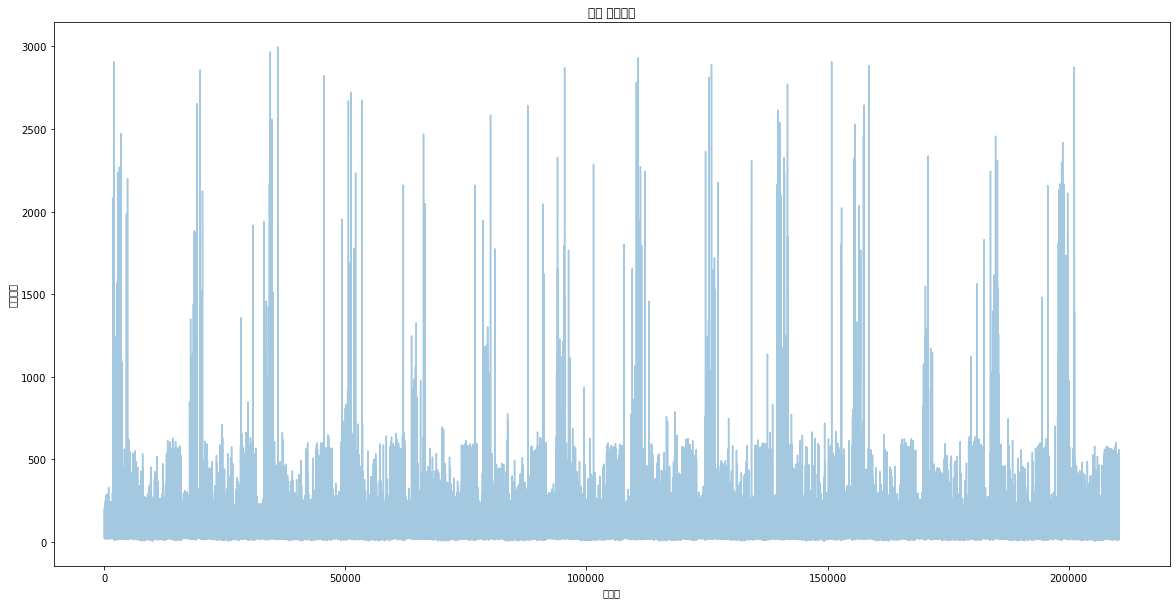

In [84]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

## 코드 작성          
train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)

plt.title('버스 운행시간')
plt.xlabel('인덱스')
plt.ylabel('운행시간')

plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\

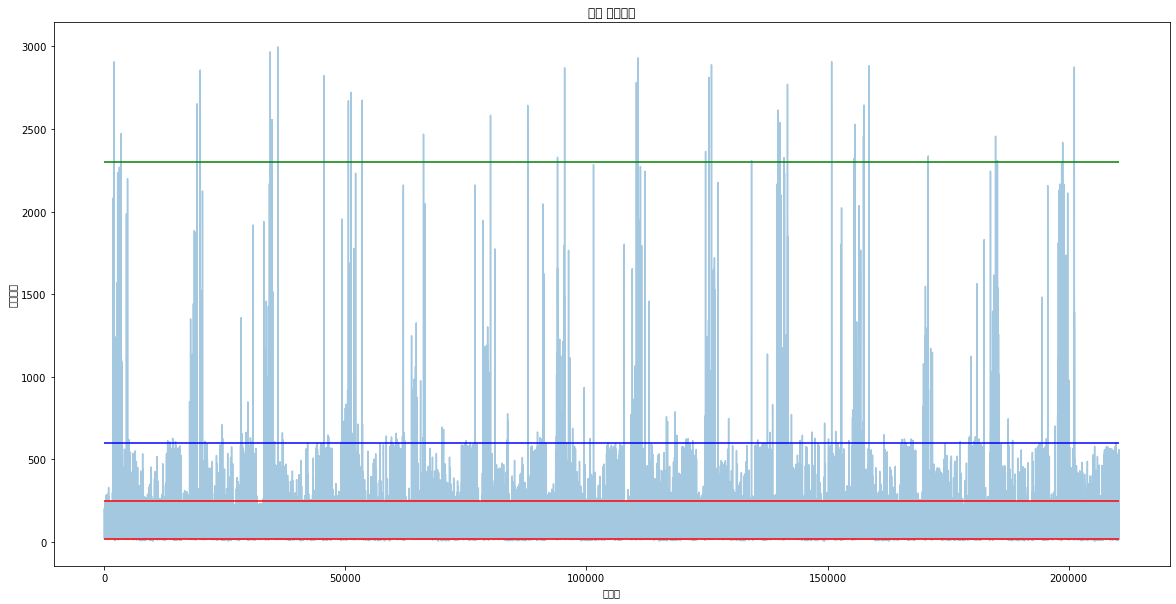

In [85]:
train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)    

plt.title('버스 운행시간')    
plt.xlabel('인덱스')    
plt.ylabel('운행시간')    

plt.hlines(y = 20, xmin=0, xmax=len(train), colors='red')    
plt.hlines(y = 250, xmin=0, xmax=len(train), colors='red')    
plt.hlines(y = 600, xmin=0, xmax=len(train), colors='blue')    
plt.hlines(y = 2300, xmin=0, xmax=len(train), colors='green')    

plt.show()    

### 버스 운행 시간 구간별 데이터셋

In [86]:
a = train[train['next_arrive_time']<20]
b = train[(train['next_arrive_time']>=20) & (train['next_arrive_time']<250)]
c = train[(train['next_arrive_time']>=250) & (train['next_arrive_time']<600)]
d = train[(train['next_arrive_time']>=600) & (train['next_arrive_time']<2300)]
e = train[(train['next_arrive_time']>=2300)]

### 버스 운행 시간 구간별 횟수 시각화

In [90]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

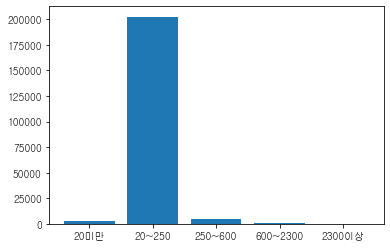

In [91]:
lst1 = [len(a), len(b), len(c), len(d), len(e)]
plt.bar(['20미만', '20~250', '250~600', '600~2300', '2300이상'], lst1)
plt.show()

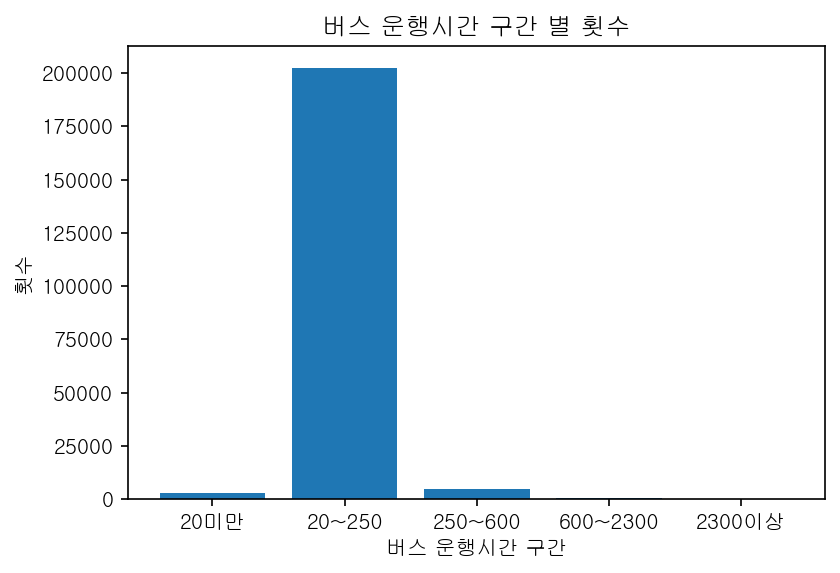

In [92]:
x = ['20미만', '20~250', '250~600', '600~2300', '2300이상']
y = [len(a),len(b),len(c),len(d),len(e)]

plt.figure(dpi=150)

plt.title('버스 운행시간 구간 별 횟수')
plt.xlabel('버스 운행시간 구간')
plt.ylabel('횟수')

plt.bar(x,y)
plt.show()

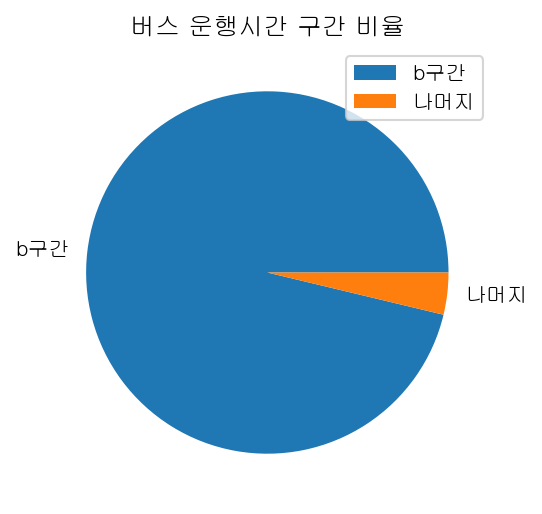

In [93]:
x = ['b구간', '나머지']
y = [len(b)/len(train), (1-len(b)/len(train))]

plt.figure(dpi=150)

plt.title('버스 운행시간 구간 비율')

plt.pie(y, labels=x)
plt.legend()
plt.show()

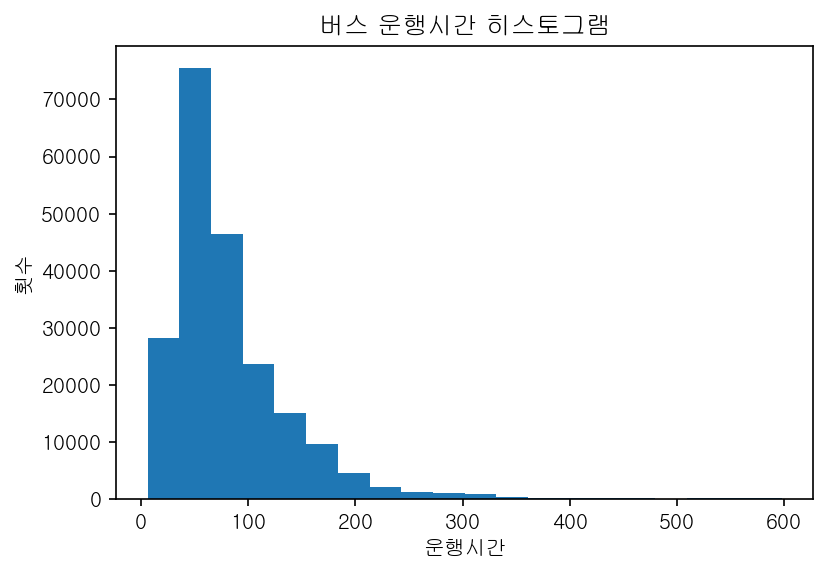

In [94]:
plt.figure(dpi=150)

plt.title('버스 운행시간 히스토그램')
plt.xlabel('운행시간')
plt.ylabel('횟수')

plt.hist(train[train['next_arrive_time']<600]['next_arrive_time'], bins=20)
plt.show()

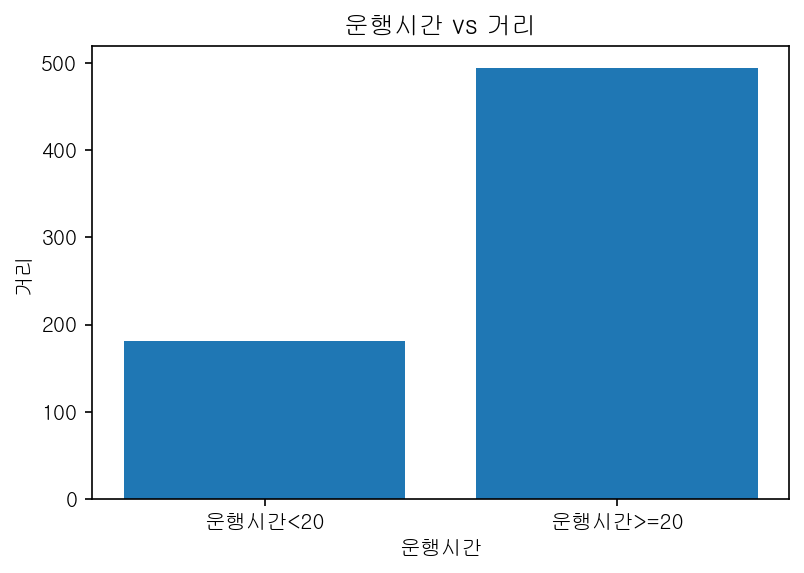

In [95]:
x = ['운행시간<20', '운행시간>=20']
y = [a['distance'].mean(), pd.concat([b,c,d,e])['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

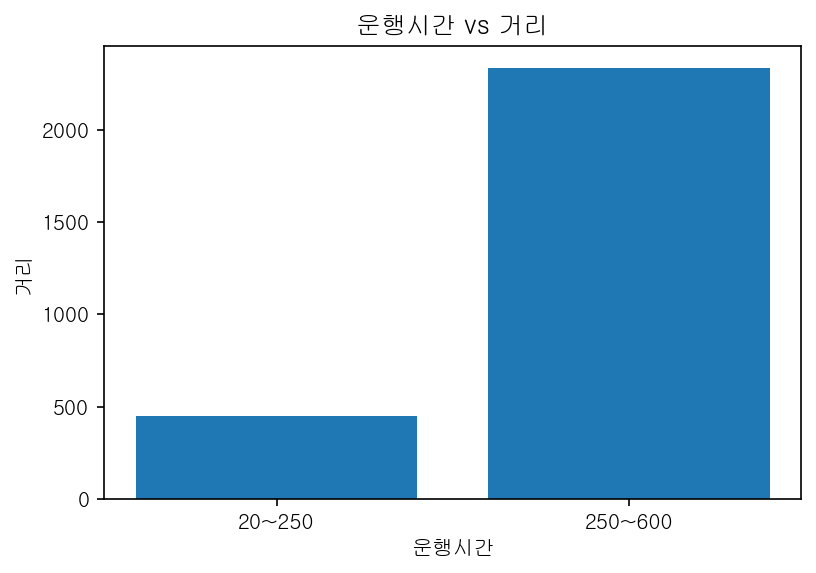

In [96]:
x = ['20~250', '250~600']
y = [b['distance'].mean(), c['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

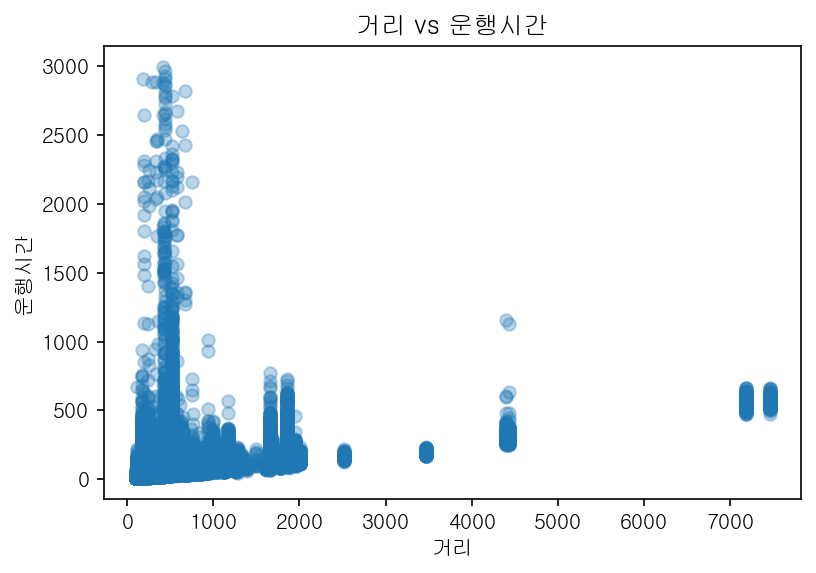

In [97]:
import matplotlib.patches as patches

x = train['distance']
y = train['next_arrive_time']

plt.figure(dpi = 150)

plt.title('거리 vs 운행시간')
plt.xlabel('거리')
plt.ylabel('운행시간')

plt.scatter(x,y, alpha = 0.3)

plt.show()

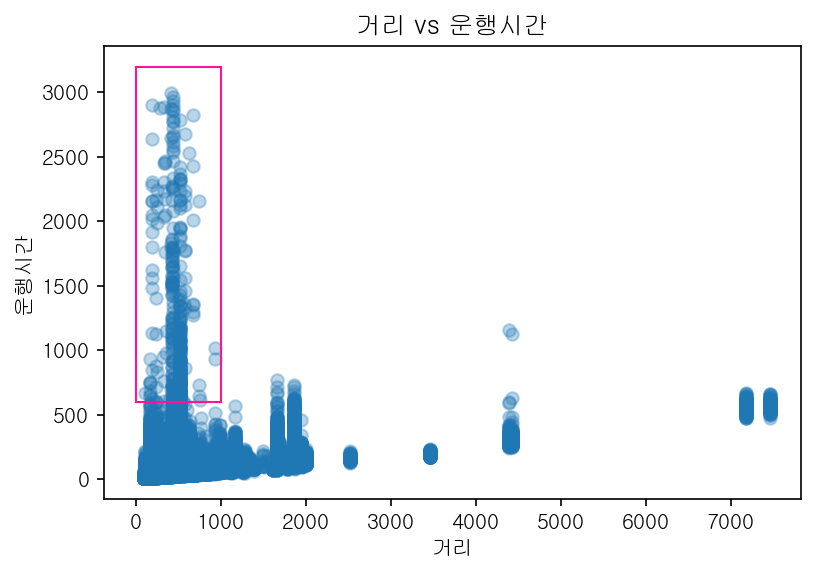

In [98]:
import matplotlib.patches as patches

x = train['distance']
y = train['next_arrive_time']

plt.figure(dpi = 150)

plt.title('거리 vs 운행시간')
plt.xlabel('거리')
plt.ylabel('운행시간')

plt.scatter(x,y, alpha = 0.3)

# 이상치 표시하기 - 직사각형
plt.gca().add_patch(
    patches.Rectangle(
        (0, 600),
        1000, 2600,               
        edgecolor = 'deeppink',
        fill=False,
    ))

plt.show()

### 지도에서 이상치 표현

In [99]:
import folium

locations = train[(train['distance'] <= 1000) & (train['next_arrive_time'] >= 600)][['next_latitude', 'next_longitude']].values.tolist()

center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]
          
m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

for location in locations:
    folium.Circle(
        radius=300,
        location=location,
        fill=True
    ).add_to(m)

m


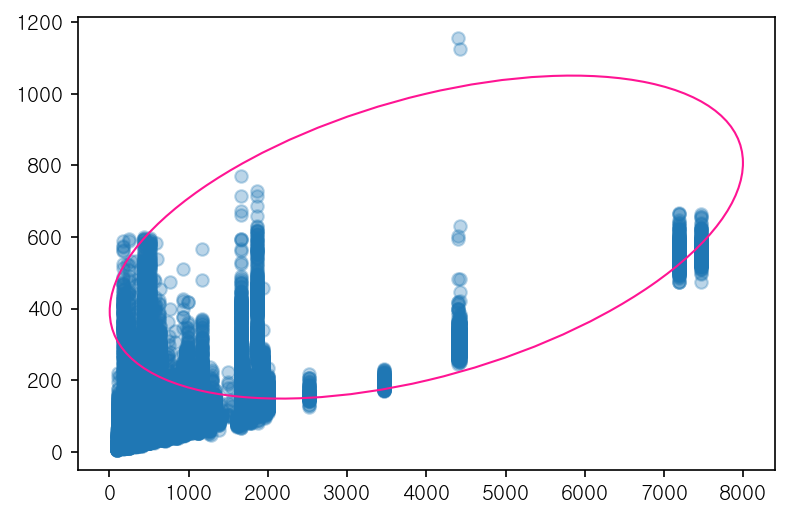

In [100]:
temp = train[(train['distance'] >= 1000) | (train['next_arrive_time'] <= 600)]

x = temp['distance']
y = temp['next_arrive_time']

plt.figure(dpi = 150)
plt.scatter(x,y, alpha = 0.3)

# 운행시간 분포 표시하기 - 타원
plt.gca().add_patch(
   patches.Ellipse(
      (4000, 600),
      8000, 800,               
      edgecolor = 'deeppink',
      fill=False,
      angle=3
   ))


In [101]:
# 운행 시간이 2300 이상인 데이터의 좌표 정보 (list)
locations = train[train['next_arrive_time'] >= 2300][['next_latitude', 'next_longitude']].values.tolist()

# 지도 중심 좌표
center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]

# 지도 그리기
m = folium.Map(location=center, zoom_start=11)

# 점(Circle) 표시하기
for location in locations:
    folium.Circle(
        radius=300,
        location=location,
        fill=True
    ).add_to(m)

m

In [104]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] >= 2300)]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
2003,2003,2019-10-15,405136002,7997082,360-2,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2906
3487,3487,2019-10-15,405136521,7997070,365-21,33.458900,126.557300,제대아파트,16시,435.0,제주대학교,33.460114,126.561659,2472
19236,19236,2019-10-16,405136521,7997001,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2652
19864,19864,2019-10-16,405136521,7997087,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2856
34763,34763,2019-10-17,405136521,7997070,365-21,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2556
50606,50606,2019-10-18,405136521,7997001,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2670
51100,51100,2019-10-18,405136521,7997087,365-21,33.458900,126.557300,제대아파트,13시,435.0,제주대학교,33.460114,126.561659,2722
80094,80094,2019-10-20,405136521,7997001,365-21,33.458900,126.557300,제대아파트,21시,435.0,제주대학교,33.460114,126.561659,2582
95465,95465,2019-10-21,405136521,7997089,365-21,33.458900,126.557300,제대아파트,16시,435.0,제주대학교,33.460114,126.561659,2870
110341,110341,2019-10-22,405136012,7997033,360-12,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2780


In [105]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 2300)][['next_latitude', 'next_longitude']].iloc[0].values.tolist()

[33.460114000000004, 126.561659]

In [107]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 2300)][['next_latitude', 'next_longitude']].iloc[0].values

array([ 33.460114, 126.561659])

In [108]:
#제주대학교 좌표
locations = [train[(train['next_station'] == '제주대학교')][['next_latitude', 'next_longitude']].iloc[0].values.tolist(),
             train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 2300)][['next_latitude', 'next_longitude']].iloc[0].values.tolist()]

# 지도 중심 좌표
center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]

# 지도 그리기
m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

# 점 찍기
for i, location in enumerate(locations):
    folium.Circle(
        radius=10,
        location=location,
        tooltip=i,
        fill=True
    ).add_to(m)

m


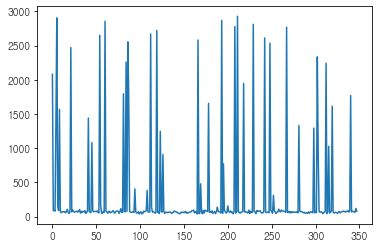

In [109]:
# 운행 시간이 긴 데이터
X = train[train['next_longitude'] == 126.561659]['next_arrive_time'].reset_index(drop=True).index
Y = train[train['next_longitude'] == 126.561659]['next_arrive_time'].reset_index(drop=True).values

plt.plot(X,Y)
plt.show()

In [111]:
# 데이터 전처리 함수
def transform_df(df:pd.DataFrame):

    # my_dict 적용
    df[['route_nm', 'now_station', 'next_station']] = df[['route_nm', 'now_station', 'next_station']].applymap(lambda x:my_dict[x])

    # 시간 정보 str -> int 데이터 타입 변환 함수
    def text_to_time(text:str):
        return int(text[:2])

    # 시간 데이터 타입 변환 함수 적용
    df['now_arrive_time'] = df['now_arrive_time'].map(text_to_time)
  
    return df
 
train = transform_df(train)
test = transform_df(test)

In [112]:
# 이상치 실습
train = train[train['next_arrive_time'] <= 1000]

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210257 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210257 non-null  int64  
 1   date              210257 non-null  object 
 2   route_id          210257 non-null  int64  
 3   vh_id             210257 non-null  int64  
 4   route_nm          210257 non-null  int64  
 5   now_latitude      210257 non-null  float64
 6   now_longitude     210257 non-null  float64
 7   now_station       210257 non-null  int64  
 8   now_arrive_time   210257 non-null  int64  
 9   distance          210257 non-null  float64
 10  next_station      210257 non-null  int64  
 11  next_latitude     210257 non-null  float64
 12  next_longitude    210257 non-null  float64
 13  next_arrive_time  210257 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 24.1+ MB


In [114]:
features = train.columns[2:-1]     
target = train.columns[-1]    

X = train[features]     
y = train[target]


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, shuffle=False)

#데이터 shape 확인
print(f"X_train.shape : {X_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"X_valid.shape : {X_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

X_train.shape : (189231, 11)
y_train.shape : (189231,)
X_valid.shape : (21026, 11)
y_valid.shape : (21026,)


In [116]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [117]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [122]:
pred = model.predict(X_valid)

In [119]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test[features])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[ 33.29983333  43.87916667 134.67701587  60.47752381 172.45316667
  28.04971429  72.90690476 203.95104762 130.37157143 117.64061905]


In [120]:
submission['next_arrive_time'] = predict     
submission.head()

,id,next_arrive_time
0,210457,33.299833
1,210458,43.879167
2,210459,134.677016
3,210460,60.477524
4,210461,172.453167


In [123]:
# 검증
from sklearn.metrics import r2_score

r2_score(y_valid, pred)

0.7059877140412798

In [124]:
submission.to_csv('submission.csv', index=False)